In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import *
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    OrdinalEncoder,
    TargetEncoder,
    FunctionTransformer,
)

sklearn.set_config(transform_output="pandas")

from catboost import CatBoostRegressor

import lightgbm as lgb

import xgboost as xgb

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold

# for model learning
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)

# tunning hyperparamters model
import optuna

In [40]:
test = pd.read_csv("./data/train.csv")

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
X = test.drop("SalePrice", axis=1).copy()
y = np.log(test["SalePrice"].copy())

In [66]:
X.shape

(1460, 80)

#### Делаем список с количеством уникальных значений по колонкам

In [67]:
num_of_unique = {}
for c in X.columns:
    num_of_unique[c] = test[c].nunique()
num_of_unique

{'Id': 1460,
 'MSSubClass': 15,
 'MSZoning': 5,
 'LotFrontage': 110,
 'LotArea': 1073,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'OverallQual': 10,
 'OverallCond': 9,
 'YearBuilt': 112,
 'YearRemodAdd': 61,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 3,
 'MasVnrArea': 327,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinSF1': 637,
 'BsmtFinType2': 6,
 'BsmtFinSF2': 144,
 'BsmtUnfSF': 780,
 'TotalBsmtSF': 721,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 '1stFlrSF': 753,
 '2ndFlrSF': 417,
 'LowQualFinSF': 24,
 'GrLivArea': 861,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'KitchenQual': 4,
 'TotRmsAbvGrd': 12,

#### Список с кол-вом nan по колонкам

In [79]:
nan_count = pd.DataFrame(data={"NaN_count": X.isna().sum(), "data_type": X.dtypes})
cols_with_nans = nan_count[nan_count["NaN_count"] > 0].copy()
cols_with_nans

,NaN_count,data_type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,872,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [81]:
cols_with_nans.shape[0]

19

In [87]:
X[X["GarageType"] == "NA"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


#### Разделяем num и cat features по описанию в data_description.txt

In [69]:
num_features = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "GarageYrBlt",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "YrSold",
]
cat_features = []
for c in X.columns:
    if c not in num_features and c != "Id":
        cat_features.append(c)

print(*num_features, sep=" ")
print(*cat_features, sep=" ")
print(len(cat_features) + len(num_features) == X.shape[1] - 1)

LotFrontage LotArea YearBuilt YearRemodAdd MasVnrArea BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF GrLivArea GarageYrBlt GarageArea WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal YrSold
MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature MoSold SaleType SaleCondition
True


#### Проверяем все ли num признаки имеют праильный тип данных

In [70]:
test.loc[::, num_features].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageYrBlt      float64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
dtype: object

#### Посмотрим распределение цены в тренировочном датасете

''

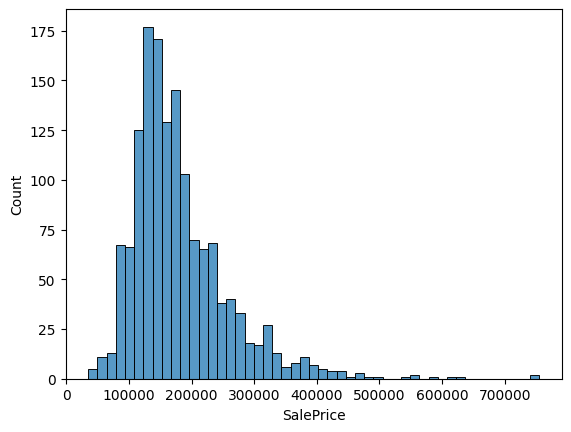

In [73]:
sns.histplot(test["SalePrice"])
;

##### Также посмотрим в логарифме

''

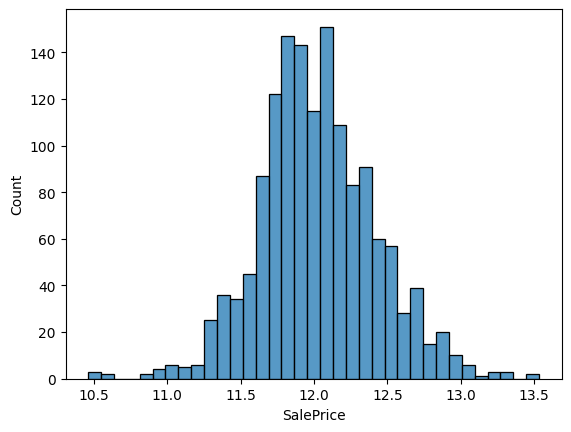

In [71]:
sns.histplot(y)
;

> **У цены хорошее распределение близкое к нормальному, отсутствуют большие выбросы. Все цены лежат в диапазоне 50к - 750к, что лежит примерно в 1 порядке.**

In [49]:
scaler = ColumnTransformer(
    [("scaling_num_columns", StandardScaler(), num_features)],
    verbose_feature_names_out=False,
    remainder="passthrough",
)

In [50]:
encoder = ColumnTransformer(
    [("encoding", OrdinalEncoder(), cat_features)],
    verbose_feature_names_out=False,
    remainder="passthrough",
)

In [51]:
preprocessor = Pipeline(
    [
        ("scaler", scaler),  # ("encoder", encoder)
    ]
)

In [52]:
X_preproc = preprocessor.fit_transform(X.copy())

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_preproc, y, test_size=0.2, random_state=42
)

In [56]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
254,-0.002058,-0.212153,-0.472560,-1.350194,-0.572835,1.049169,-0.288653,-0.396727,0.585036,0.391697,...,1,TA,TA,Y,NaN,NaN,NaN,6,WD,Normal
1066,-0.455206,-0.268578,0.719786,0.442586,-0.572835,-0.973018,-0.288653,0.524681,-0.589275,-0.940928,...,2,TA,TA,Y,NaN,NaN,NaN,5,WD,Normal
638,-0.125644,-0.174369,-2.029235,-1.689368,-0.572835,-0.973018,-0.288653,0.517889,-0.596115,-0.948691,...,0,NaN,NaN,P,NaN,MnPrv,NaN,5,WD,Normal
799,-0.414011,-0.332419,-1.134975,-1.689368,0.819401,0.274948,-0.288653,-0.917424,-0.744329,-0.469981,...,1,TA,TA,Y,NaN,MnPrv,NaN,6,WD,Normal
380,-0.825963,-0.552908,-1.565545,-1.689368,-0.572835,-0.494887,-0.288653,0.545056,-0.071666,-0.353538,...,1,TA,TA,Y,NaN,NaN,NaN,5,WD,Normal


In [74]:
model = CatBoostRegressor(random_seed=42, cat_features=cat_features)
model.fit(X_train, y_train)
print("catboost accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("catboost accuracy: ", accuracy_score(y_valid, model.predict(X_valid)))

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=27]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.